# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | kerikeri
Processing Record 3 of Set 1 | kununurra
Processing Record 4 of Set 1 | sungai penuh
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | hard bargain
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | muzayri'
City not found. Skipping...
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | hurricane
Processing Record 19 of Set 1 | coello
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | iqalu

Processing Record 40 of Set 4 | kovdor
Processing Record 41 of Set 4 | barroquinha
Processing Record 42 of Set 4 | manokwari
Processing Record 43 of Set 4 | san antonio de pale
Processing Record 44 of Set 4 | nguigmi
Processing Record 45 of Set 4 | tralee
Processing Record 46 of Set 4 | ts'nori
Processing Record 47 of Set 4 | manta
Processing Record 48 of Set 4 | val-d'or
Processing Record 49 of Set 4 | la ronge
Processing Record 0 of Set 5 | new norfolk
Processing Record 1 of Set 5 | ust'-uda
Processing Record 2 of Set 5 | auki
Processing Record 3 of Set 5 | parabel'
Processing Record 4 of Set 5 | poronaysk
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | bayanhongor
Processing Record 7 of Set 5 | monterey
Processing Record 8 of Set 5 | morehead city
Processing Record 9 of Set 5 | dunedin
Processing Record 10 of Set 5 | enewetak
Processing Record 11 of Set 5 | grimstad
Processing Record 12 of Set 5 | piterka
Processing Record 13 of Set 5 | susuman
Processing Rec

City not found. Skipping...
Processing Record 33 of Set 8 | kattivakkam
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | abeche
Processing Record 36 of Set 8 | pimenta bueno
Processing Record 37 of Set 8 | kailua-kona
Processing Record 38 of Set 8 | fortuna
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | thinadhoo
Processing Record 41 of Set 8 | inarajan village
Processing Record 42 of Set 8 | labuan bajo
Processing Record 43 of Set 8 | liezen
Processing Record 44 of Set 8 | es castell
Processing Record 45 of Set 8 | kokopo
Processing Record 46 of Set 8 | purcell
Processing Record 47 of Set 8 | guelmim
Processing Record 48 of Set 8 | codajas
Processing Record 49 of Set 8 | maputo
Processing Record 0 of Set 9 | novoagansk
Processing Record 1 of Set 9 | ayacucho
Processing Record 2 of Set 9 | shiyan
Processing Record 3 of Set 9 | nagqu
Processing Record 4 of Set 9 | jiagedaqi
Processing Record 5 of Set 9 | yarega
Processing Record 6 of Set 9

Processing Record 21 of Set 12 | darwin
Processing Record 22 of Set 12 | axim
Processing Record 23 of Set 12 | satka
Processing Record 24 of Set 12 | neiva
Processing Record 25 of Set 12 | manadhoo
Processing Record 26 of Set 12 | oruro
Processing Record 27 of Set 12 | saint-pierre
Processing Record 28 of Set 12 | sisimiut
Processing Record 29 of Set 12 | xique xique
Processing Record 30 of Set 12 | haiku-pauwela
Processing Record 31 of Set 12 | katsuura
Processing Record 32 of Set 12 | ishigaki
Processing Record 33 of Set 12 | dwarka
Processing Record 34 of Set 12 | lompoc
Processing Record 35 of Set 12 | st ives
Processing Record 36 of Set 12 | rongelap
Processing Record 37 of Set 12 | sola
Processing Record 38 of Set 12 | camayenne
Processing Record 39 of Set 12 | rebrikha
Processing Record 40 of Set 12 | preobrazheniye
Processing Record 41 of Set 12 | kruisfontein
Processing Record 42 of Set 12 | kharp
Processing Record 43 of Set 12 | lakhdenpokh'ya
Processing Record 44 of Set 12 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,16.16,80,0,7.20,ZA,1699394519
1,kerikeri,-35.2268,173.9474,18.28,74,52,1.79,NZ,1699394519
2,kununurra,-15.7667,128.7333,25.99,69,1,0.00,AU,1699394520
3,sungai penuh,-2.0833,101.3833,18.46,98,100,0.39,ID,1699394520
4,ushuaia,-54.8000,-68.3000,6.81,53,75,4.63,AR,1699394314


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/TS_cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/TS_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,16.16,80,0,7.20,ZA,1699394519
1,kerikeri,-35.2268,173.9474,18.28,74,52,1.79,NZ,1699394519
2,kununurra,-15.7667,128.7333,25.99,69,1,0.00,AU,1699394520
3,sungai penuh,-2.0833,101.3833,18.46,98,100,0.39,ID,1699394520
4,ushuaia,-54.8000,-68.3000,6.81,53,75,4.63,AR,1699394314


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

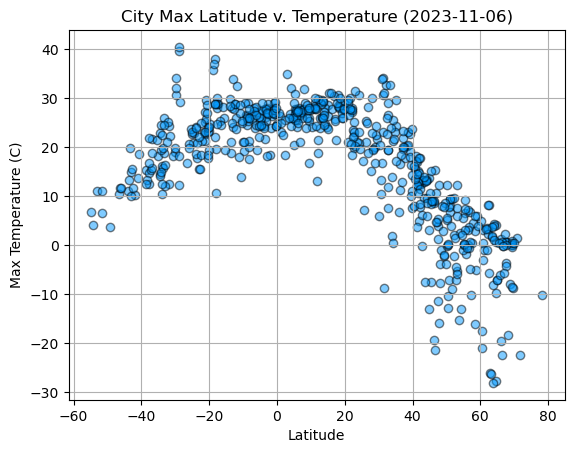

In [11]:
# Build scatter plot for latitude vs. temperature
#Data Setup
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
alpha_value = .5

#Plot
plt.scatter(latitude, temperature, alpha=alpha_value, color='#0099FF', edgecolors='black')

# Label
plt.title("City Max Latitude v. Temperature (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save out
plt.savefig("output_data/TSFig1.png")

# Cleanup
plt.show()

#### Latitude Vs. Humidity

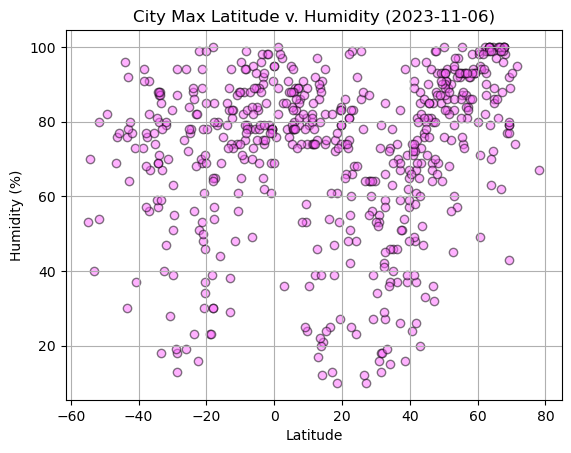

In [12]:
# Build the scatter plots for latitude vs. humidity
#Data Setup
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
alpha_value = .5

#Plot
plt.scatter(latitude, humidity, alpha=alpha_value, color='#FF66FF', edgecolors='black')

# Label
plt.title("City Max Latitude v. Humidity (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save out
plt.savefig("output_data/TSFig2.png")

# Cleanup
plt.show()

#### Latitude Vs. Cloudiness

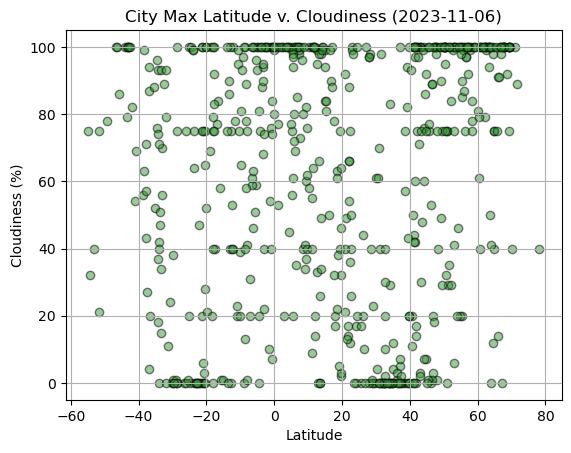

In [13]:
# Build the scatter plots for latitude vs. cloudiness
#Data Setup
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
alpha_value = .5

#Plot
plt.scatter(latitude, cloudiness, alpha=alpha_value, color='#339933', edgecolors='black')

# Label
plt.title("City Max Latitude v. Cloudiness (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save Out
plt.savefig("output_data/TSFig3.png")

# Cleanup
plt.show()

#### Latitude vs. Wind Speed Plot

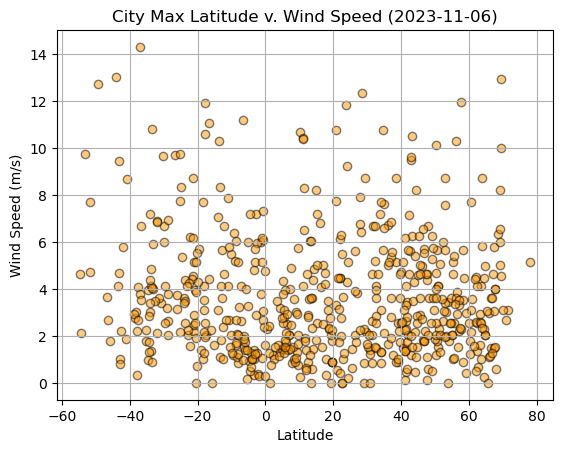

In [14]:
# Build the scatter plots for latitude vs. wind speed
#Data Setup
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
alpha_value = .5

#Plot
plt.scatter(latitude, wind_speed, alpha=alpha_value, color='#FF9900', edgecolors='black')

# Label
plt.title("City Max Latitude v. Wind Speed (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save out
plt.savefig("output_data/TSFig4.png")

# Cleanup
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def regression_line(arg1, arg2):
    slope, intercept, r_value, p_value, std_err = linregress(arg1, arg2)
    line = slope * arg1 + intercept
    equation_text = f"y = {round(slope,2)}x + {round(intercept,2)}"
    return line, r_value, round(slope,2), round(intercept,2), equation_text
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,hard bargain,26.3167,-77.5667,25.36,78,44,5.64,BS,1699394521
8,badger,64.8000,-147.5333,-7.07,89,75,2.06,US,1699394522
9,albany,42.6001,-73.9662,12.55,65,71,5.62,US,1699394293
11,aasiaat,68.7098,-52.8699,-7.88,77,92,6.34,GL,1699394523
12,ilulissat,69.2167,-51.1000,0.01,43,75,8.23,GL,1699394523


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,16.16,80,0,7.20,ZA,1699394519
1,kerikeri,-35.2268,173.9474,18.28,74,52,1.79,NZ,1699394519
2,kununurra,-15.7667,128.7333,25.99,69,1,0.00,AU,1699394520
3,sungai penuh,-2.0833,101.3833,18.46,98,100,0.39,ID,1699394520
4,ushuaia,-54.8000,-68.3000,6.81,53,75,4.63,AR,1699394314


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6979701031928159.


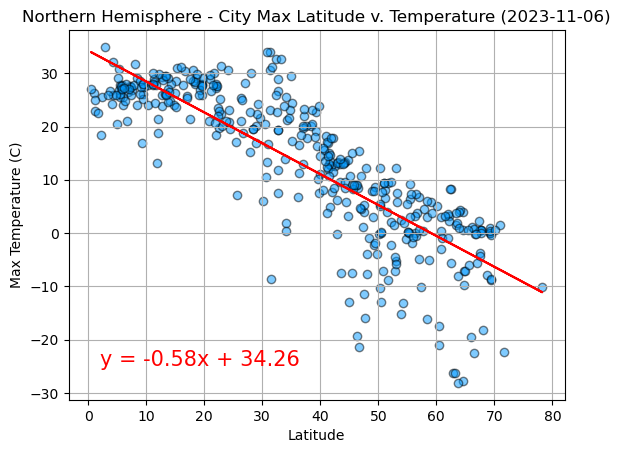

In [22]:
# Linear regression on Northern Hemisphere
#Data Setup
latitude = northern_hemi_df['Lat']
temperature = northern_hemi_df['Max Temp']
nh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, temperature)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, temperature, alpha=alpha_value, color='#0099FF', edgecolors='black')
plt.plot(latitude, nh_reg_line, color='#FF0000')
plt.text(2, -25, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Northern Hemisphere - City Max Latitude v. Temperature (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

#Cleanup
plt.show()

The r-value is: 0.4004898219080237.


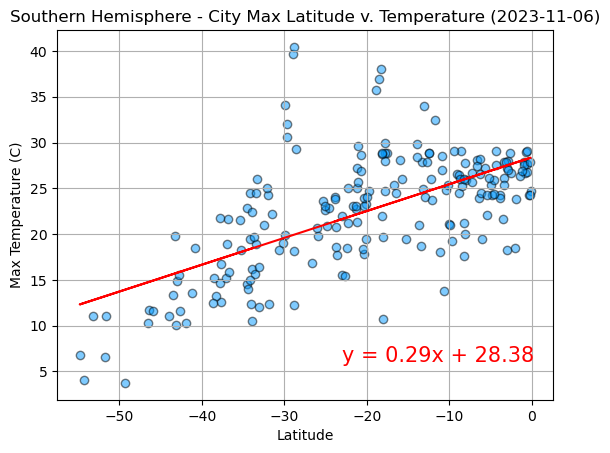

In [27]:
# Linear regression on Southern Hemisphere
#Data Setup
latitude = southern_hemi_df['Lat']
temperature = southern_hemi_df['Max Temp']
sh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, temperature)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, temperature, alpha=alpha_value, color='#0099FF', edgecolors='black')
plt.plot(latitude, sh_reg_line, color='#FF0000')
plt.text(-23, 6, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Southern Hemisphere - City Max Latitude v. Temperature (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

#Cleanup
plt.show()

**Discussion about the linear relationship:** In the case of Northern/Southern Hemisphere Latitude versus Temperature there is a linear relationship here. We can see that both R values are very positive and are relatively close to 1. I would say the northern map is closer in positive correlation and would argue strong positive correlation. Even though the southern map does have a slightly lower r-value we can still visually see groupings trending in the same positive correlary, and thus, arguably the same postive relationship exists. This makes sense as the father you are from the equater (0), the cooler the temperatures are. I suspect that the outliers may be due to altitude, weather patterns, and proximity to bodies of water.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0779100157721897.


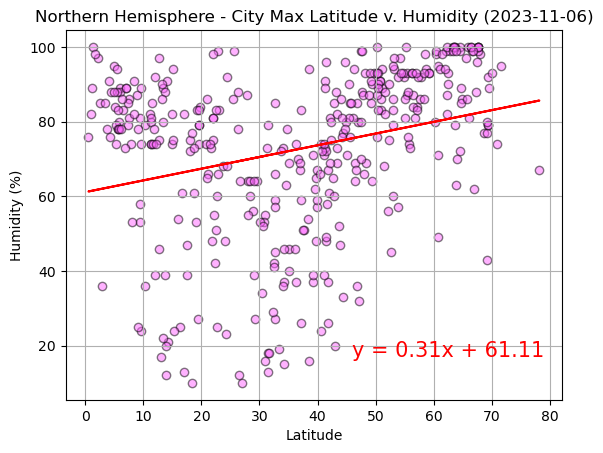

In [49]:
# Northern Hemisphere
#Data Setup
latitude = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']
nh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, humidity)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, humidity, alpha=alpha_value, color='#FF66FF', edgecolors='black')
plt.plot(latitude, nh_reg_line, color='#FF0000')
plt.text(46, 17, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Northern Hemisphere - City Max Latitude v. Humidity (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Cleanup
plt.show()

The r-value is: 0.0526734843304566.


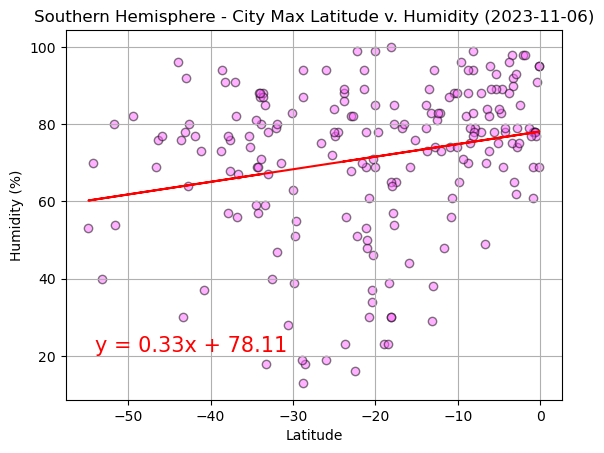

In [44]:
# Southern Hemisphere
#Data Setup
latitude = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']
sh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, humidity)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, humidity, alpha=alpha_value, color='#FF66FF', edgecolors='black')
plt.plot(latitude, sh_reg_line, color='#FF0000')
plt.text(-54, 21, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Southern Hemisphere - City Max Latitude v. Humidity (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Cleanup
plt.show()

**Discussion about the linear relationship:**  In the case of Northern/Southern Hemisphere Latitude versus Humidity there is no linear relationship here. We can see that both R values are very low and are relatively close to 0. While the Northern Hemisphere does have a larger R-Value correlation over the Southern Hemisphere, you can see that is only due to more data points in the Northern data set. Also you can see the line does not fit visually as well. This makes sense as humidity is most likely an independent factor more related to altitude, proximity to bodies of water, prevailing winds, or human activities and not related to how far you are from the equater (0).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.026616315387440075.


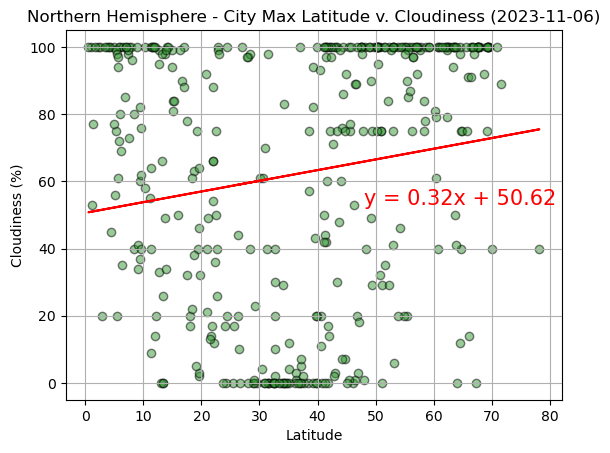

In [41]:
# Northern Hemisphere
#Data Setup
latitude = northern_hemi_df['Lat']
cloudiness = northern_hemi_df['Cloudiness']
nh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, cloudiness)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, cloudiness, alpha=alpha_value, color='#339933', edgecolors='black')
plt.plot(latitude, nh_reg_line, color='#FF0000')
plt.text(48, 53, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Northern Hemisphere - City Max Latitude v. Cloudiness (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Cleanup
plt.show()

The r-value is: 0.010971696023540903.


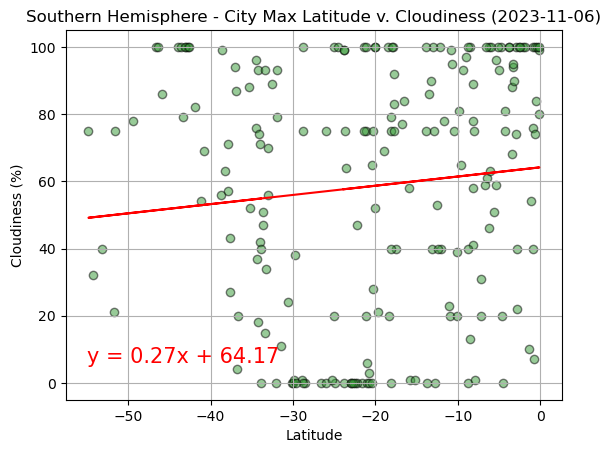

In [52]:
# Southern Hemisphere
#Data Setup
latitude = southern_hemi_df['Lat']
cloudiness = southern_hemi_df['Cloudiness']
sh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, cloudiness)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, cloudiness, alpha=alpha_value, color='#339933', edgecolors='black')
plt.plot(latitude, sh_reg_line, color='#FF0000')
plt.text(-55, 6, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Southern Hemisphere - City Max Latitude v. Cloudiness (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Cleanup
plt.show()

**Discussion about the linear relationship:** In the case of Northern/Southern Hemisphere Latitude versus Cloudiness there is no linear relationship here. We can see that both R values are very low and are relatively close to 0. You can also you can see the line does not fit visually as well. This makes sense as cloudiness is most likely an independent factor more related to atmospheric content, topography, winds, or temperature and not related to how far you are from the equater (0).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012142596894813272.


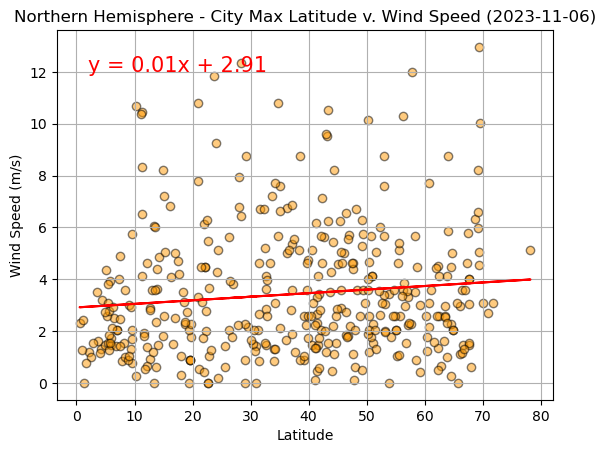

In [32]:
# Northern Hemisphere
#Data Setup
latitude = northern_hemi_df['Lat']
wind_speed = northern_hemi_df['Wind Speed']
nh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, wind_speed)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, wind_speed, alpha=alpha_value, color='#FF9900', edgecolors='black')
plt.plot(latitude, nh_reg_line, color='#FF0000')
plt.text(2, 12, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Northern Hemisphere - City Max Latitude v. Wind Speed (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

#Cleanup
plt.show()

The r-value is: 0.046271576479418416.


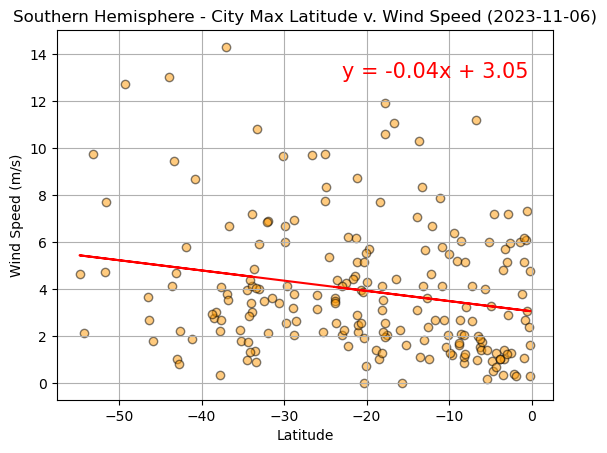

In [35]:
# Southern Hemisphere
#Data Setup
latitude = southern_hemi_df['Lat']
wind_speed = southern_hemi_df['Wind Speed']
sh_reg_line, r_value, slope, intercept, equation_text = regression_line(latitude, wind_speed)
alpha_value = .5

# Print the r value
print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(latitude, wind_speed, alpha=alpha_value, color='#FF9900', edgecolors='black')
plt.plot(latitude, sh_reg_line, color='#FF0000')
plt.text(-23, 13, equation_text, fontsize=15, color='#FF0000')

# Label
plt.title("Southern Hemisphere - City Max Latitude v. Wind Speed (2023-11-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

#Cleanup
plt.show()

**Discussion about the linear relationship:** In the case of Northern/Southern Hemisphere Latitude versus Wind Speed there is no linear relationship here. We can see that both R values are very low and are relatively close to 0. You can also you can see the line does not fit visually as well. This makes sense as wind speed is most likely an independent factor more related to global wind patterns, weather systems, proximity to bodies of water, or presense of local features and topography and not related to how far you are from the equater (0).